In [1]:
## Hypothesis generator for the GSS Data:
from hypothesis import Hypothesis

import os
from quasinet import qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
from IPython.display import Image
from IPython.core.display import HTML

yr = '2018'
GSSDATA = 'csv_files/gss_'+yr+'.csv'
qnet_dir = 'qnets/'
outdirname = 'dotfiles/'
qnet_path = qnet_dir + 'gss_'+yr+'.joblib'

In [2]:
## read Qnet file and load it into Qnet model. 
## Later, if it doesn't exist, we can fit the data into the model and save the new joblib file 
## (removing the redundant "fit" conditional below)

data_obj=dataFormatter(GSSDATA)
model_obj = model()
if os.path.exists(qnet_path):
    model_obj.load(qnet_path)
else:
    fit = False
    if fit:
        model_obj.fit(data_obj = data_obj)
        model_obj.save(qnet_path)

In [3]:
cognet_obj = cg()


cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.dmat_filewriter("GSS_cognet.py", qnet_path,
                           MPI_SETUP_FILE="GSS_mpi_setup.sh",
                           MPI_RUN_FILE="GSS_mpi_run.sh",
                           MPI_LAUNCHER_FILE="GSS_mpi_launcher.sh",
                           YEARS='2018',NODES=4,T=14)
cognet_obj.samples


,wrkstat,HRS1,HRS2,evwork,wrkslf,wrkgovt,OCC10,PRESTG10,PRESTG105PLUS,INDUS10,...,neisafe,rlooks,rgroomed,rweight,rhlthend,wtss,wtssnr,wtssall,vstrat,vpsu
0,temp not working,e,c,nan,someone else,private,b,c,c,c,...,very safe,nan,nan,nan,nan,e,e,e,3301,1
1,working fulltime,c,e,nan,someone else,private,b,d,d,c,...,very safe,nan,nan,nan,nan,c,c,c,3301,1
2,working fulltime,c,e,nan,someone else,private,c,d,d,c,...,very safe,attractive,about average,about the right weight,nan,c,c,c,3301,1
3,working fulltime,e,e,nan,someone else,private,c,c,c,c,...,somewhat safe,about average,about average,slightly underweight,excellent,c,c,c,3301,1
4,working fulltime,c,e,nan,self-employed,private,c,c,c,c,...,very unsafe,very unattractive,very poorly groomed,very overweight,poor,c,c,c,3301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,retired,e,e,yes,someone else,private,d,c,c,c,...,very safe,nan,nan,nan,nan,c,c,c,3378,2
1780,school,e,e,no,nan,nan,e,e,e,e,...,somewhat safe,about average,about average,slightly underweight,excellent,d,d,d,3378,2
1781,working fulltime,c,e,nan,someone else,government,c,c,c,c,...,very safe,nan,nan,nan,nan,c,c,c,3378,2
1782,working parttime,c,e,nan,someone else,private,c,b,b,c,...,very safe,about average,about average,slightly overweight,excellent,c,c,c,3378,2


In [4]:
## Generating tree files

qnet_model = qnet.load_qnet(qnet_path)

if not os.path.exists(outdirname):
    model_obj.save(qnet_path)
    os.mkdir(outdirname)

## Only generate tree files if dotfiles directory is empty
if len(os.listdir(outdirname)) == 0:
    for idx, feature_name in enumerate(qnet_model.feature_names):
        qnet.export_qnet_tree(qnet_model, idx, os.path.join(outdirname, '{}.dot'.format(feature_name)), 
                              outformat = "graphviz", detailed_output = True)

    ! cd 'dotfiles'; for i in `ls *dot`; do dot -Tpng $i -o ${i/dot/png}; done >& /dev/null

-rw-rw-r-- 1 lrmantovani pi-ishanu  7.4M Nov 24 20:39 dotfiles/region.png
-rw-rw-r-- 1 lrmantovani pi-ishanu  6.9M Nov 24 20:44 dotfiles/SEI10EDUC.png
-rw-rw-r-- 1 lrmantovani pi-ishanu  6.6M Nov 24 20:22 dotfiles/intage.png
ls: write error: Broken pipe


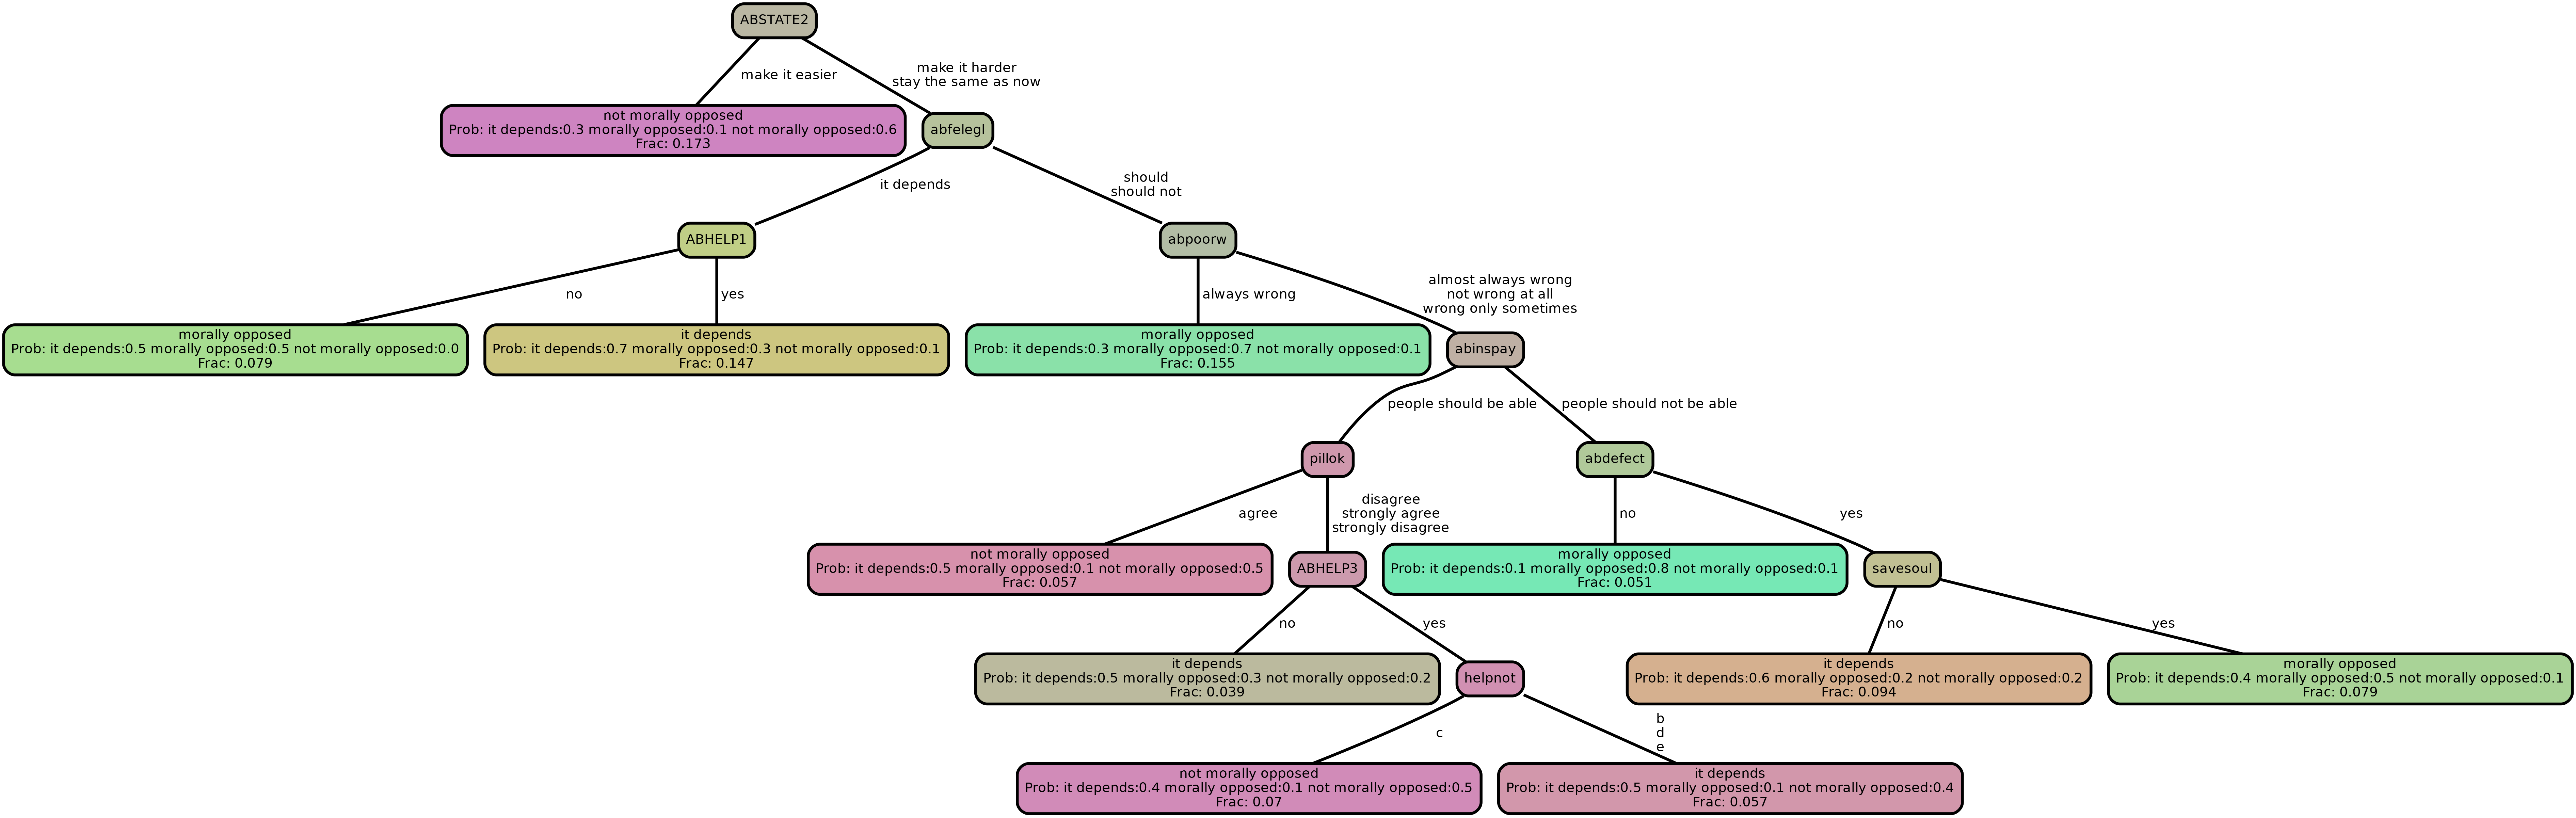

In [5]:
! ls -lhS dotfiles/*png | head -n 3
## Viewing the generated tree file
Image(filename= outdirname + 'abmoral.png')

In [6]:
## Generating hypothesis

hyp_dot = outdirname + 'hypothesis_GSS.dot'
hypothesis = Hypothesis(model_path = outdirname, detailed_labels = True,
                       no_self_loops = True)

hypothesis.get()
hypothesis.to_dot(hyp_dot)
hypothesis.hypotheses.sort_values('src')


100%|██████████| 39/39 [00:09<00:00,  4.09it/s]


,src,tgt,lomar,pvalue
28,abany,abnomore,0.359461,0.000000e+00
16,abany,abrape,0.053321,0.000000e+00
39,abany,absingle,0.023841,5.307596e-154
24,abany,abdefect,0.055602,5.126138e-246
15,abdefect,abrape,0.092875,0.000000e+00
26,abdefect,abnomore,0.001732,1.066679e-02
12,abdefect,abhlth,0.074253,0.000000e+00
22,abhlth,abdefect,0.017826,3.326328e-146
14,abhlth,abrape,0.000916,3.211963e-01
47,abnomore,abany,0.239762,0.000000e+00


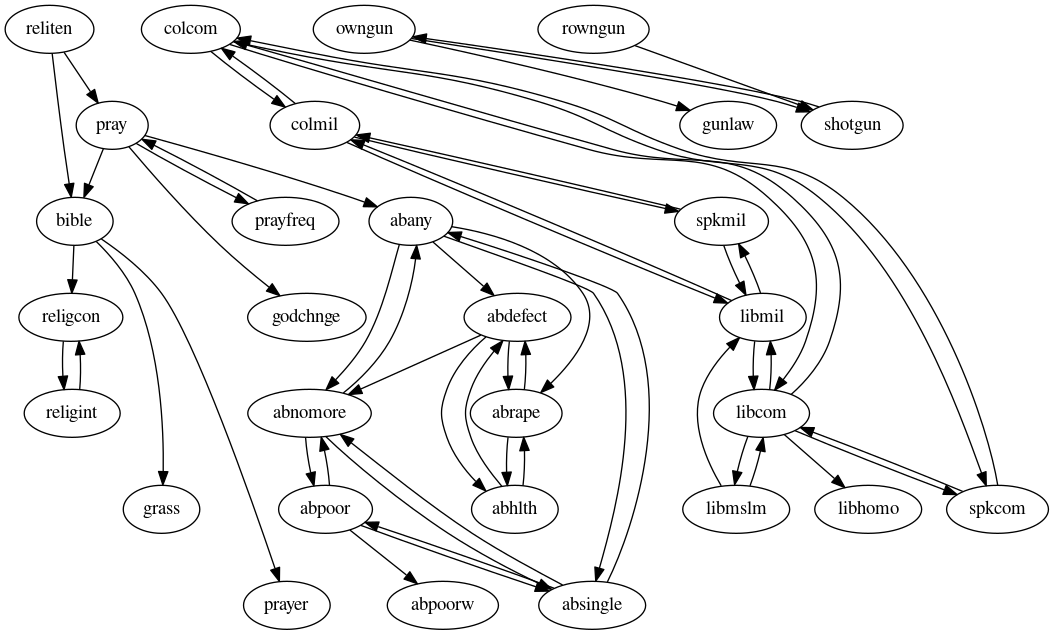

In [7]:
!dot -Tpng dotfiles/hypothesis_GSS.dot -o dotfiles/hypothesis_GSS.png
from IPython.display import Image
Image(outdirname + 'hypothesis_GSS.png')

In [8]:
# Generating CSV output of hypothesis

hypothesis.to_csv('hypothesis_GSS.csv')